In [237]:
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [13]:
LAG_ORDER = 55
HORIZON = 200

In [3]:
SIGNIFICANT_P = 0.05
def test_stationarity(data, maxlag):
    # AIC - autolag parameter which automates
    # the selection of the lag length based on information criteria and penalises complex models.

    # ct - ct: It stands for "constant and trend."
    # The regression model includes both a constant (intercept) and a linear trend term.
    result = adfuller(data, maxlag=maxlag, regression='ct')
    isStationary = False
    if (result[0] < result[4]["1%"] and result[0] < result[4]["5%"] and result[0] < result[4]["10%"]\
        and result[1] < SIGNIFICANT_P):
        isStationary = True
    else:
        isStationary = False
    
    return { "stationarity": result, "isStationary": isStationary }

In [4]:
def forecast_accuracy(forecast, actual):
        print(forecast)
        print("------------")
        print(actual)
        mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
        me = np.mean(forecast - actual)             # ME
        mae = np.mean(np.abs(forecast - actual))    # MAE
        mpe = np.mean((forecast - actual)/actual)   # MPE
        rmse = np.mean((forecast - actual)**2)**.5  # RMSE
        # corr = np.corrcoef(forecast, actual)[0,1]   # corr
        # mins = np.amin(np.hstack([forecast[:,None], 
        #                         actual[:,None]]), axis=1)
        # maxs = np.amax(np.hstack([forecast[:,None], 
        #                         actual[:,None]]), axis=1)
        # minmax = 1 - np.mean(mins/maxs)             # minmax
        return({'mape':mape, 'me':me, 'mae': mae, 
                'mpe': mpe, 'rmse':rmse })


In [7]:
def convert_data_to_stationary(df, maxlag):
    # how to deal with non linear non stationarity?
    # put an upper limit on the order
    df_diff = df.copy()
    diff_order = -1
    is_stationary = False
    while is_stationary == False:
        diff_order += 1
        for i in range(len(df_diff.columns)):

            stationarityTestResult = test_stationarity(df_diff[df_diff.columns[i]], maxlag)
            is_stationary = stationarityTestResult["isStationary"]
            print('Column {0} stationarity: {1}'.format(df_diff.columns[i], is_stationary))
            if is_stationary == False:
                print('False')
                break
        print("is_stationary -> {0}, differenced {1} times".format(is_stationary, diff_order))
        # Apply differencing to make data stationary
        df_diff = df_diff.diff().dropna()
    return df_diff, diff_order

In [20]:
f = open('/Users/yarynakorduba/Projects/master-thesis-full-stack/src/front/js/pages/App/test.json')
data_serie = json.load(f)
data_serie[1]
data_serie_trimmed = data_serie
data_df = pd.DataFrame.from_records(data_serie_trimmed)
data_df = data_df.filter(['sound','co2'], axis=1)

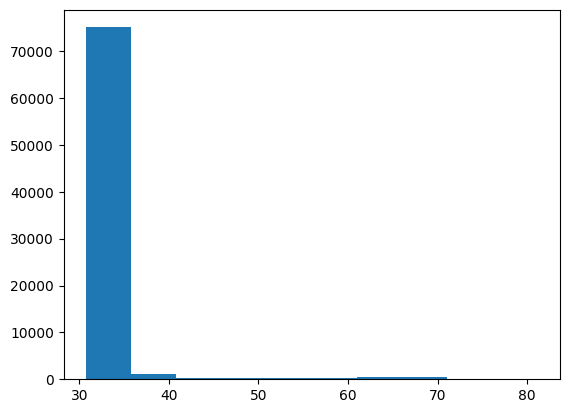

In [18]:
plt.hist(data_df["sound"])
plt.show()

In [45]:
data_df.isna().sum() # -> no missing values imputation needed

sound    0
co2      0
dtype: int64

In [14]:
print(data_df.min())
print(data_df.max())


sound     30.77
co2      405.10
dtype: float64
sound      81.09
co2      1666.80
dtype: float64


In [63]:
df_diff, diff_order = convert_data_to_stationary(data_df)  

Column sound stationarity: True
Column co2 stationarity: True
is_stationary -> True, differenced 0 times


sound (original)


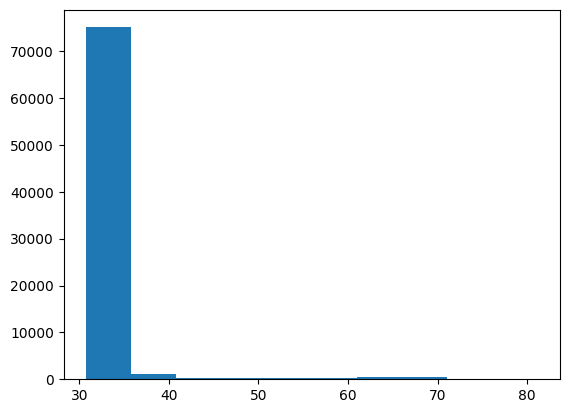

Column sound stationarity: True
Column co2 stationarity: True
is_stationary -> True, differenced 0 times
sound (differenced)


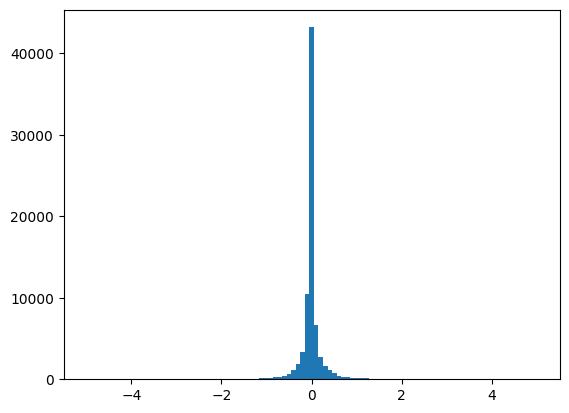

sound (scaled)


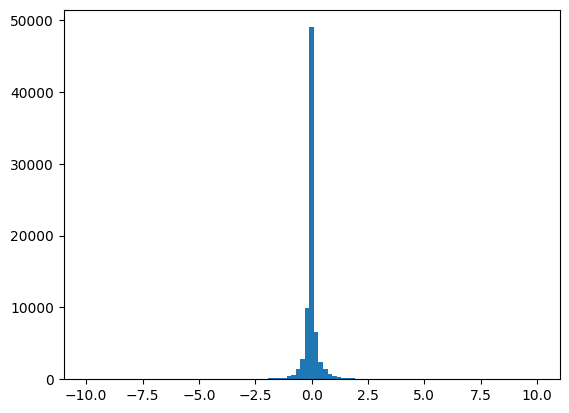

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency L will be used.
  self._init_dates(dates, freq)


The optimal lag order selected: {'aic': 62, 'bic': 62, 'hqic': 62, 'fpe': 62}
              sound       co2
const     -0.000032  0.000246
L1.sound  -0.148059  0.061686
L1.co2    -0.035996 -0.091187
L2.sound  -0.116644  0.053934
L2.co2    -0.019480 -0.035737
...             ...       ...
L60.co2    0.029932 -0.029622
L61.sound -0.009726  0.025012
L61.co2    0.014269  0.046349
L62.sound -0.003486  0.017972
L62.co2    0.012509 -0.015083

[125 rows x 2 columns]
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Feb, 2024
Time:                     13:23:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                 -0.0802476
Nobs:                     70498.0    HQIC:                 -0.102724
Log likelihood:          -195841.    FPE:                   0.893381
AIC:                    -0.112743    Det(Omega_mle):        0.890221
------------------

In [71]:
result = Predict().test_var(data_df)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [219]:
lagged_data_order = 2  # You can adjust the number of lags based on the characteristics of your data
key = 'sin_data'

# Generate sinusoidal data
np.random.seed(42)
t = np.linspace(0, 4*np.pi, 1000)
sin_data = np.sin(t) + np.random.normal(scale=0.01, size=len(t))

# Create a DataFrame
data = pd.DataFrame(sin_data, columns=[key])


# Lag the data to create a VAR model
for i in range(1, lagged_data_order):
    data[f'{key}_lag{i}'] = (data[key] * 10).shift(i)

# Drop NaN values created by lagging
data = data.dropna()
data_df = data.dropna()



In [198]:
key = 'lag_1'
# Generate sinusoidal data
np.random.seed(42)
t = np.linspace(0, 4*np.pi, 2000)
first_channel = np.float32(np.random.uniform(0, 1.0, size=2000)<0.01)
second_channel = np.roll(first_channel, shift=10)

sin_data = np.sin(t) + np.random.normal(scale=0.01, size=len(t))

# Create a DataFrame
my_dict = {"lag_1":first_channel, "lag_2":second_channel}
data = pd.DataFrame(my_dict)


# # Lag the data to create a VAR model
# for i in range(1, lagged_data_order):
#     if i == 0:
#         data[f'{key}_lag{i}'] = first_channel
#     if i == 1:
#         data[f'{key}_lag{i}'] = second_channel
    #data[f'{key}_lag{i}'] = (data[key] * 10).shift(i)

# Drop NaN values created by lagging
data = data.dropna()
data_df = data.dropna()
data_df.head()


,lag_1,lag_2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [318]:
f = open('/Users/yarynakorduba/Projects/master-thesis-full-stack/src/front/js/pages/App/test.json')
data_serie = json.load(f)
data_serie[1]
data_serie_trimmed = data_serie
data_df = pd.DataFrame.from_records(data_serie_trimmed)

data_df.index = pd.to_datetime(data_df['timestamp'], unit = 'ms')
data_df = data_df.drop(columns=['timestamp'])
data_df.head()

,oxygen,health,dewpt,no2,TypPS,tvoc,gauss,sound,temperature,co2
timestamp,,,,,,,,,,
2023-07-30 00:00:41,20.637,809,15.703,48.78,2.0,383.0,0.572311,32.08,23.614,413.0
2023-07-30 00:02:42,20.636,809,15.702,48.89,1.7,383.0,0.246442,32.06,23.611,413.0
2023-07-30 00:04:41,20.636,808,15.700,48.95,2.3,384.0,0.537173,32.07,23.609,411.9
2023-07-30 00:06:42,20.639,807,15.700,49.25,1.3,382.0,0.167089,32.10,23.609,411.7
2023-07-30 00:08:43,20.636,806,15.698,49.28,1.1,382.0,0.267584,32.07,23.606,411.6


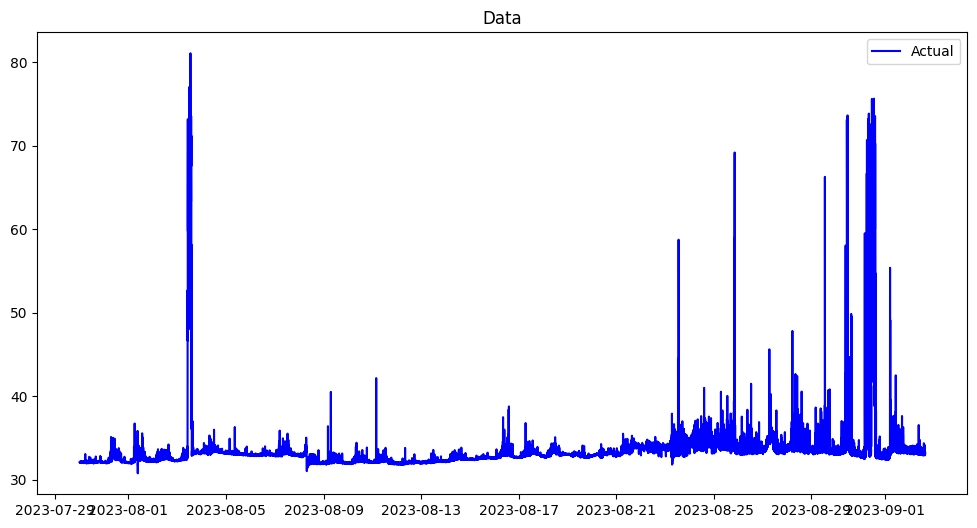

In [328]:
key="sound"
plt.figure(figsize=(12, 6))
plt.plot(data_df.index, data_df[key], label='Actual', color='blue')
plt.title(f'Data')
plt.legend() 
plt.show()

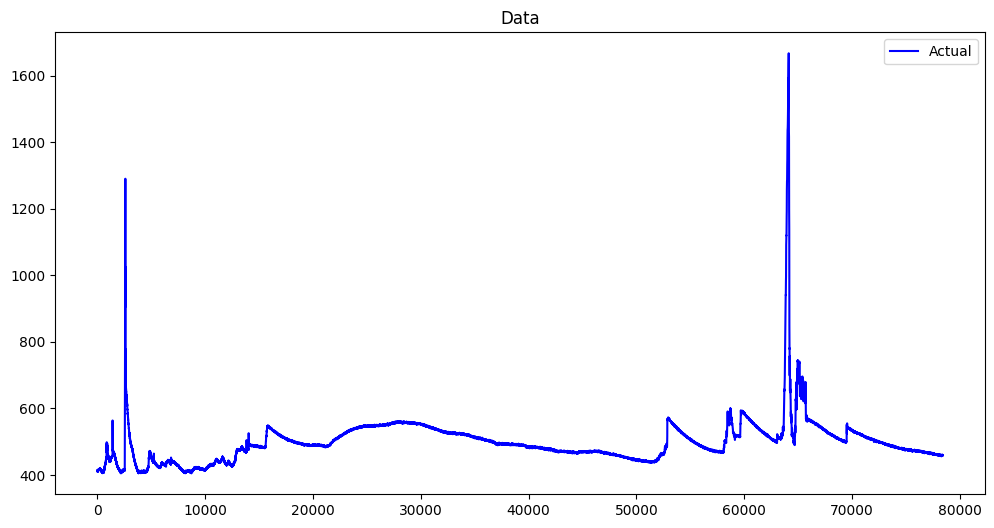

In [287]:
key="co2"
plt.figure(figsize=(12, 6))
plt.plot(data_df.index, data_df[key], label='Actual', color='blue')
plt.title(f'Data')
plt.legend() 
plt.show()

In [330]:
# key="lag_1"
# lagged_data_order = 2  # You can adjust the number of lags based on the characteristics of your data
# key = 'sound'

data_df = data_df.filter(["sound", "co2"])
data = data_df.copy()

data = data.dropna()
data[key] = data[key].astype(float)
np.asarray(data)
data

,sound,co2
timestamp,,
2023-07-30 00:00:41,32.08,413.0
2023-07-30 00:02:42,32.06,413.0
2023-07-30 00:04:41,32.07,411.9
2023-07-30 00:06:42,32.10,411.7
2023-07-30 00:08:43,32.07,411.6
...,...,...
2023-09-02 15:49:59,33.29,459.2
2023-09-02 15:50:04,33.35,459.0
2023-09-02 15:50:09,33.37,458.8


In [331]:

max_lag_order = 62
steps = 100

stationarityTestResult = convert_data_to_stationary(data, max_lag_order)

train_size = int(0.9 * len(data))
print("Train size {0}".format(train_size))
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Initiate standard scaler to scale data in different columns
scaler = StandardScaler()
scaler.fit(train)
# Scale data using the previously defined scaler
train_data_scaled = pd.DataFrame(scaler.transform(train, copy=True), 
                    columns=train.columns, 
                    index=train.index)

test_data_scaled = pd.DataFrame(scaler.transform(test, copy=True), 
                    columns=test.columns, 
                    index=test.index)
print(data.head())
print(train_data_scaled.shape)



Column sound stationarity: True
Column co2 stationarity: True
is_stationary -> True, differenced 0 times
Train size 70560
                     sound    co2
timestamp                        
2023-07-30 00:00:41  32.08  413.0
2023-07-30 00:02:42  32.06  413.0
2023-07-30 00:04:41  32.07  411.9
2023-07-30 00:06:42  32.10  411.7
2023-07-30 00:08:43  32.07  411.6
(70560, 2)


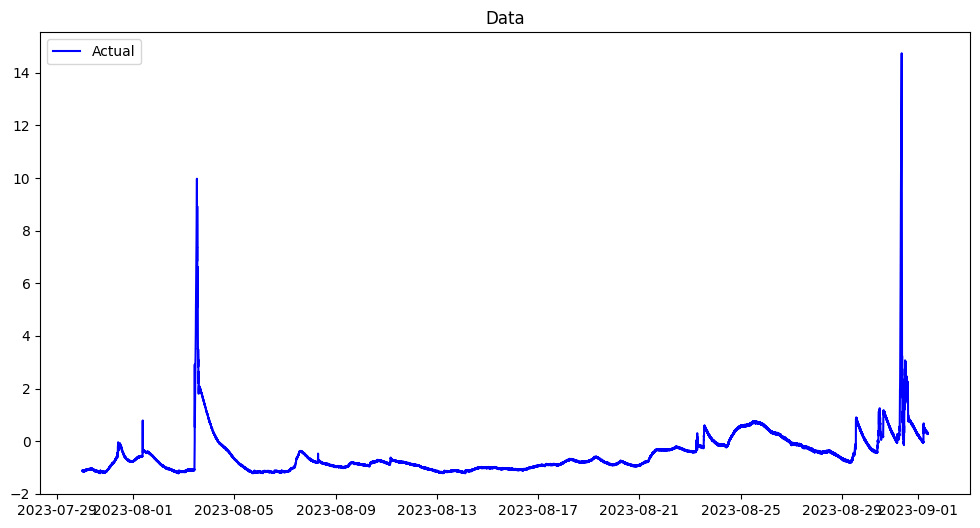

In [311]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_scaled.index, train_data_scaled[key], label='Actual', color='blue')
plt.title(f'Data')
plt.legend() 
plt.show()

In [332]:

real_data_counterpart = test.head(steps)
real_data_counterpart_scaled = test_data_scaled.head(steps)

In [333]:
model = VAR(train_data_scaled)

optimal_lags = model.select_order(maxlags=max_lag_order, trend="n")
print(f"The optimal lag order selected: {optimal_lags} \n{optimal_lags.summary()}")

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


IndexError: index 62 is out of bounds for axis 0 with size 62

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


lag order for fit: 62, k_ar lag order 62
key sound, lag order 62
rmse_val scaled: 0.18630824758625167


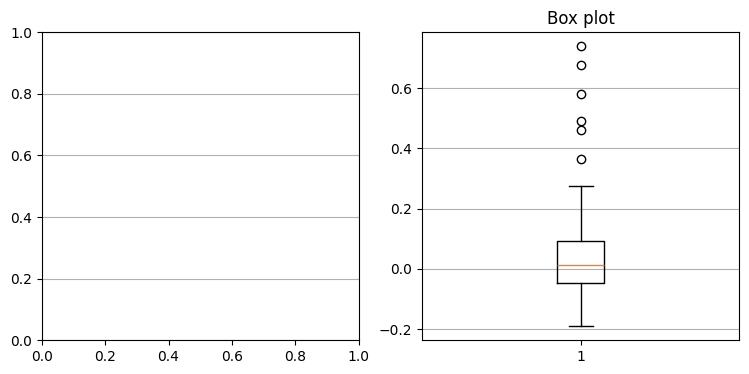

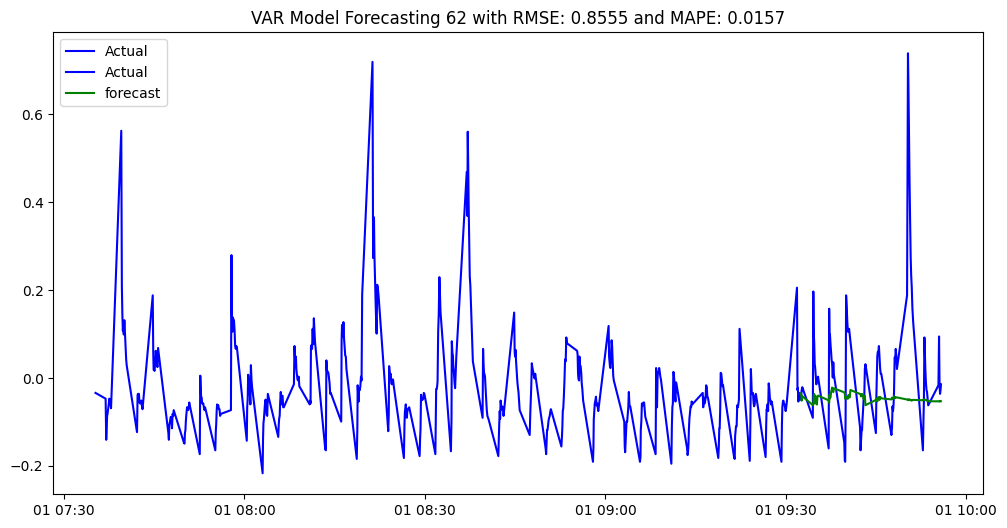

key co2, lag order 62
rmse_val scaled: 0.028148041587771393


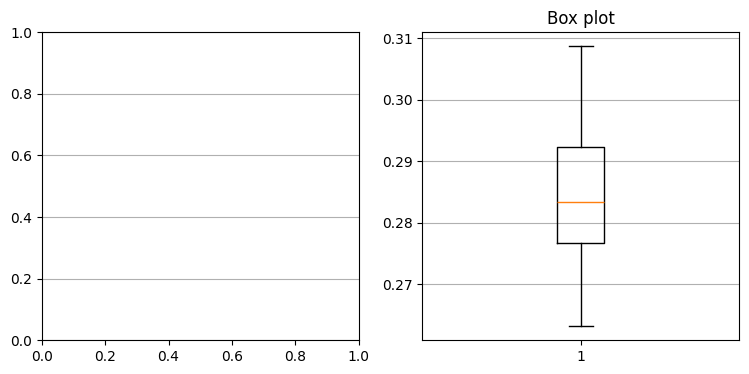

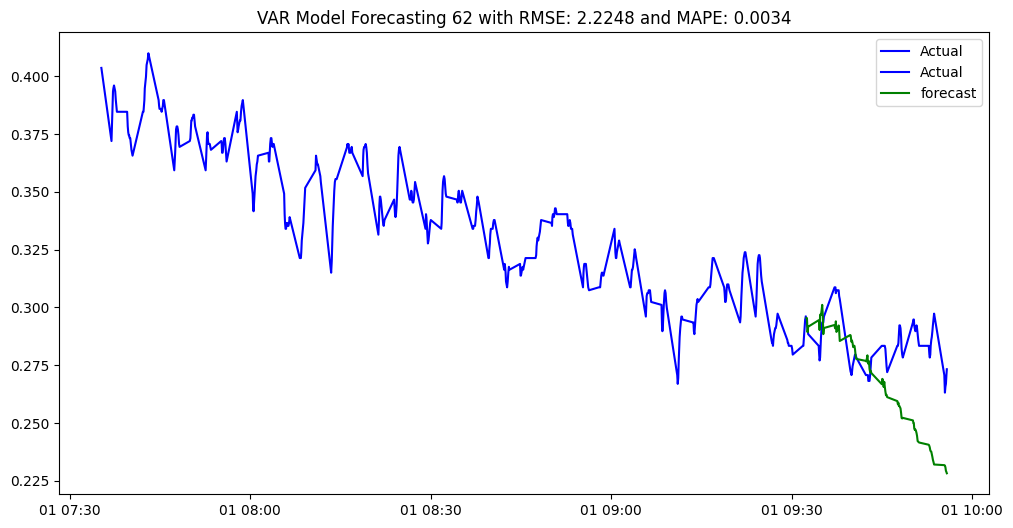

In [336]:
# Fit VAR model
model = VAR(train_data_scaled)

optimal_lags = model.select_order(maxlags=max_lag_order, trend="n")
# print(f"The optimal lag order selected: {optimal_lags}")

model_fitted = model.fit(optimal_lags.selected_orders['aic'])

# Forecasting
lag_order = model_fitted.k_ar
print(f"lag order for fit: {optimal_lags.selected_orders['aic']}, k_ar lag order {lag_order}")
forecast_scaled_data = model_fitted.forecast(train_data_scaled.values[-lag_order:], steps=steps)
forecast_scaled = pd.DataFrame(forecast_scaled_data, columns=real_data_counterpart_scaled.columns, index=real_data_counterpart_scaled.index)

# Inverting the scaling

forecast = pd.DataFrame(scaler.inverse_transform(forecast_scaled, copy=True), 
            columns=real_data_counterpart_scaled.columns,
            index=real_data_counterpart_scaled.index)

for key in real_data_counterpart_scaled.columns:
    # Calculate RMSE
    rmse_val = np.sqrt(mean_squared_error(forecast[key], real_data_counterpart[key]))
    rmse_val_scaled = np.sqrt(mean_squared_error(forecast_scaled[key], real_data_counterpart_scaled[key]))

    mape_val = (mean_absolute_percentage_error(real_data_counterpart[key], forecast[key], multioutput='uniform_average'))  # MAPE
    mape_val_scaled = (mean_absolute_percentage_error(real_data_counterpart_scaled[key], forecast_scaled[key], multioutput='uniform_average'))  # MAPE
    print(f'key {key}, lag order {lag_order}')

    print(f'rmse_val scaled: {rmse_val_scaled}')

    # Evaluating and plotting
    # results[lag_order] = rmse_val_scaled
    # Plot the results
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    axs[1].boxplot(real_data_counterpart_scaled[key])
    axs[1].set_title('Box plot')
    for ax in axs:
        ax.yaxis.grid(True)

    plt.figure(figsize=(12, 6))
    plt.plot(train_data_scaled[-500:].index, train_data_scaled[-500:][key], label='Actual', color='blue')
    plt.plot(real_data_counterpart_scaled.index, real_data_counterpart_scaled[key], label='Actual', color='blue')
    plt.plot(forecast_scaled.index, forecast_scaled[key], label='forecast', color='green')
    plt.title(f'VAR Model Forecasting {lag_order} with RMSE: {rmse_val:.4f} and MAPE: {mape_val:.4f}')
    plt.legend() 
    plt.show()

Column sound stationarity: True
Column co2 stationarity: True
is_stationary -> True, differenced 0 times
Train size 70560
                     sound    co2
timestamp                        
2023-07-30 00:00:41  32.08  413.0
2023-07-30 00:02:42  32.06  413.0
2023-07-30 00:04:41  32.07  411.9
2023-07-30 00:06:42  32.10  411.7
2023-07-30 00:08:43  32.07  411.6
(70560, 2)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


lag order for fit: 99, k_ar lag order 99
key sound, lag order 99
rmse_val scaled: 0.11316521175256769


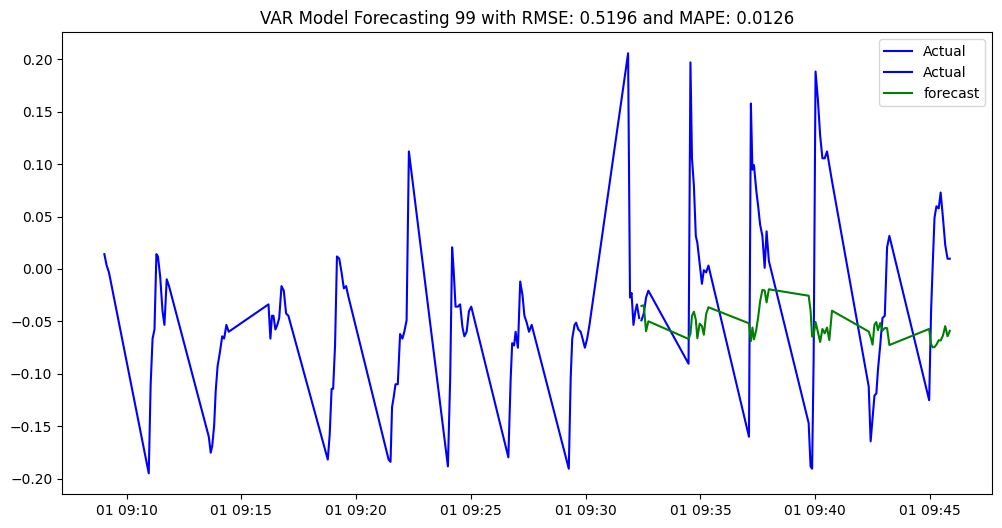

key co2, lag order 99
rmse_val scaled: 0.013514383351834061


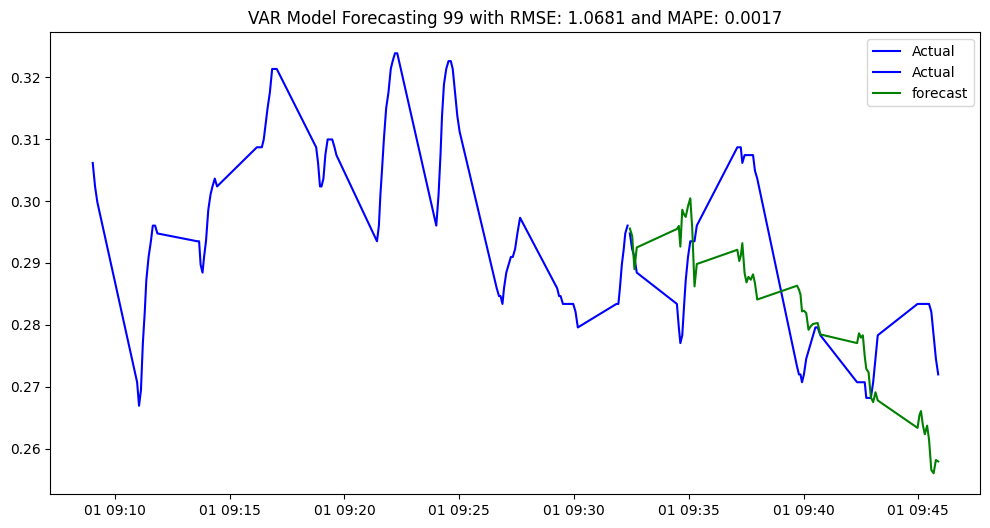

Column sound stationarity: True
Column co2 stationarity: True
is_stationary -> True, differenced 0 times
Train size 70560
                     sound    co2
timestamp                        
2023-07-30 00:00:41  32.08  413.0
2023-07-30 00:02:42  32.06  413.0
2023-07-30 00:04:41  32.07  411.9
2023-07-30 00:06:42  32.10  411.7
2023-07-30 00:08:43  32.07  411.6
(70560, 2)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


lag order for fit: 100, k_ar lag order 100
key sound, lag order 100
rmse_val scaled: 0.11355587584103904


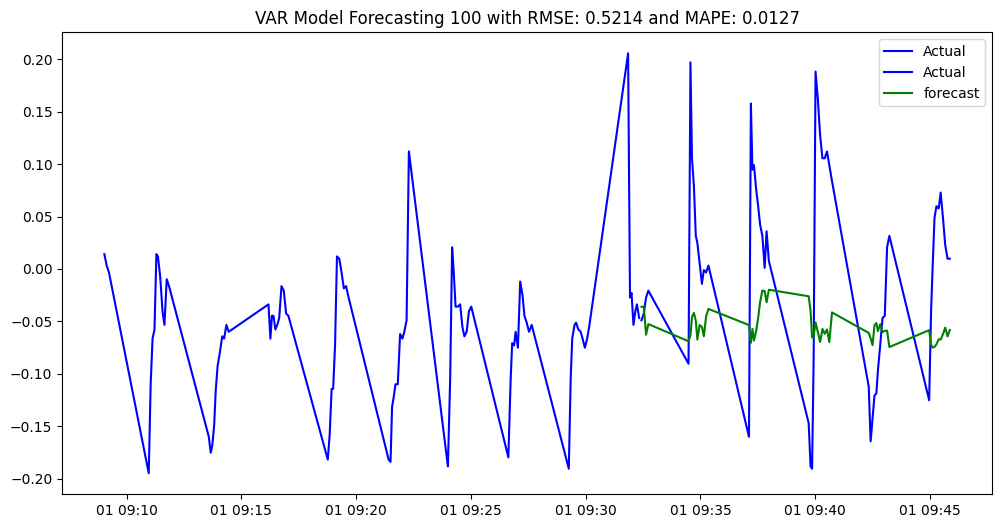

key co2, lag order 100
rmse_val scaled: 0.014216715371430945


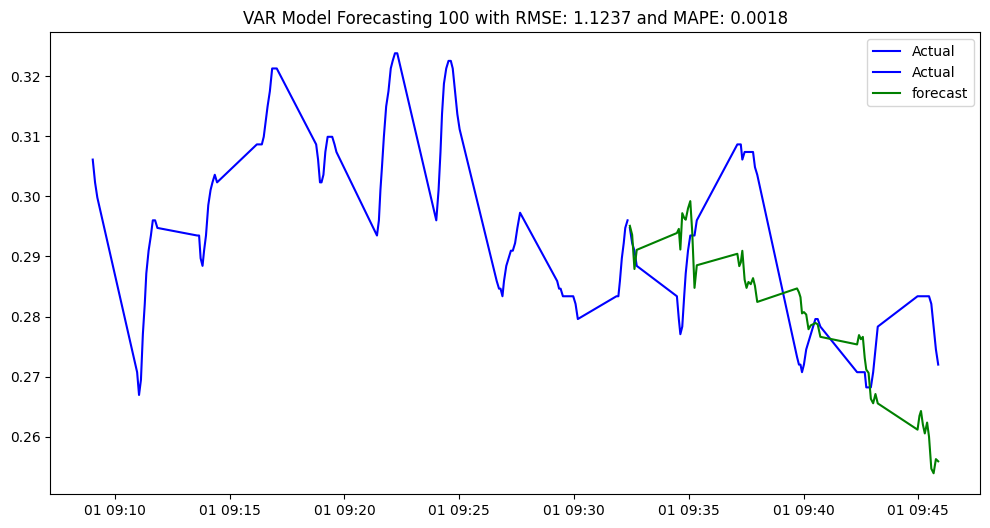

ValueError: min() arg is an empty sequence

In [342]:


results = {}

max_lag_order = 100
steps = 60


# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
# axs[1].boxplot(real_data_counterpart_scaled[key])
# axs[1].set_title('Box plot')
# for ax in axs:
#     ax.yaxis.grid(True)
# plt.show()

for l in range(99, max_lag_order+1):
    stationarityTestResult = convert_data_to_stationary(data, l)

    train_size = int(0.9 * len(data))
    print("Train size {0}".format(train_size))
    train, test = data.iloc[:train_size], data.iloc[train_size:]

    # Initiate standard scaler to scale data in different columns
    scaler = StandardScaler()
    scaler.fit(train)
    # Scale data using the previously defined scaler
    train_data_scaled = pd.DataFrame(scaler.transform(train, copy=True), 
                        columns=train.columns, 
                        index=train.index)

    test_data_scaled = pd.DataFrame(scaler.transform(test, copy=True), 
                        columns=test.columns, 
                        index=test.index)
    
    real_data_counterpart = test.head(steps)
    real_data_counterpart_scaled = test_data_scaled.head(steps)

    print(data.head())
    print(train_data_scaled.shape)
    # Fit VAR model
    model = VAR(train_data_scaled)

    optimal_lags = model.select_order(maxlags=l, trend="n")
    # print(f"The optimal lag order selected: {optimal_lags}")

    model_fitted = model.fit(optimal_lags.selected_orders['aic'])

    # Forecasting
    lag_order = model_fitted.k_ar
    print(f"lag order for fit: {l}, k_ar lag order {lag_order}")
    forecast_scaled_data = model_fitted.forecast(train_data_scaled.values[-lag_order:], steps=steps)
    forecast_scaled = pd.DataFrame(forecast_scaled_data, columns=real_data_counterpart_scaled.columns, index=real_data_counterpart_scaled.index)

    # Inverting the scaling

    forecast = pd.DataFrame(scaler.inverse_transform(forecast_scaled, copy=True), 
                columns=real_data_counterpart_scaled.columns,
                index=real_data_counterpart_scaled.index)

    for key in real_data_counterpart_scaled.columns:
        # Calculate RMSE
        rmse_val = np.sqrt(mean_squared_error(forecast[key], real_data_counterpart[key]))
        rmse_val_scaled = np.sqrt(mean_squared_error(forecast_scaled[key], real_data_counterpart_scaled[key]))

        mape_val = (mean_absolute_percentage_error(real_data_counterpart[key], forecast[key], multioutput='uniform_average'))  # MAPE
        mape_val_scaled = (mean_absolute_percentage_error(real_data_counterpart_scaled[key], forecast_scaled[key], multioutput='uniform_average'))  # MAPE
        print(f'key {key}, lag order {lag_order}')

        print(f'rmse_val scaled: {rmse_val_scaled}')

        # Evaluating and plotting
        # results[lag_order] = rmse_val_scaled
        # Plot the results

        plt.figure(figsize=(12, 6))
        plt.plot(train_data_scaled[-100:].index, train_data_scaled[-100:][key], label='Actual', color='blue')
        plt.plot(real_data_counterpart_scaled.index, real_data_counterpart_scaled[key], label='Actual', color='blue')
        plt.plot(forecast_scaled.index, forecast_scaled[key], label='forecast', color='green')
        plt.title(f'VAR Model Forecasting {lag_order} with RMSE: {rmse_val:.4f} and MAPE: {mape_val:.4f}')
        plt.legend() 
        plt.show()


min_key = min(results, key=results.get)
print("Best case: lag order {0} with MAPE {1}".format(min_key, results[min_key]))